# Lambda School Data Science Module 122
## Hypothesis Testing - Chi-Square Tests

## Prepare 
In the last lecture, we learned about the t-test, which allows you to weigh evidence for or against the claim that the mean of a population is equal to a reference value (the null hypothesis).

T-tests are often the appropriate statistical test when you are working with a quantitative, continuous variable.

However, there are lots of other kinds of data and many other methods of data analysis.  For example, we might like to examine the relationship between two categorical variables.  In that case, we'd like to use a chi-square test.  "Chi-square" refers to a particular statistical distribution in the way that the t-test is called the t-test because it depends on the t-distribution.

The chi-square test works - in general - by comparing the counts that actually appear in a two-way table to the counts we would expect to see if the two variables were not related to each other at all.

[More about the Chi-square test](https://https://en.wikipedia.org/wiki/Chi-squared_test).


## Titanic Example

In the early hours of April 15, 1912, the unsinkable ship RMS Titanic sank when it struck an iceberg, killing more than half of the passengers and crew aboard. 

The Titanic.csv dataset contains demographic information for 889 of those passengers as well as a record of whether or not each passenger survived. 

Our goal is to determine if there is a relationship between ticket class and passenger survival on the Titanic.



A chi-square test *always* tests the null hypothesis that there is *no* relationship between two variables vs. the alternative hypothesis that there *is* some relationship between the two variables.


Therefore, in this exmaple

**Ho:** There is no relationship between passenger ticket class and survival on the Titanic.

**Ha:** There is a relationship between passenger ticket class and survival on the Titanic.

In [1]:
import pandas as pd
import numpy as np
!wget https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv
data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

--2020-09-19 23:49:42--  https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44227 (43K) [text/plain]
Saving to: ‘Titanic.csv’

Titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.02s   

2020-09-19 23:49:42 (1.79 MB/s) - ‘Titanic.csv’ saved [44227/44227]

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived = 0 means the passenger did not survive and 
Surivived = 1 means the passenger did survive.

Pclass = 1, 2, 3 indicates the passenger had a 1st, 2nd or 3rd class ticket, respectively.

To start, let's look at the freqeuncy and relative frequency of surival on the Titanic.

Now let's look at the frequency and relative frequency of ticket class.


Now let's look at the joint distribution of survival by passenger class.  That means we want to see how many people fall into each combination of the two categories.

So... is there a relationship between ticket class and survival?  

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can remember how many people survived overall and how many people were in each ticket class overall.

In [13]:
# Joint distribution with margins
pd.crosstab(df['Pclass'],df['Survived'], margins=True)/len(df)

Survived,0,1,All
Pclass,,,
1,0.090192,0.153326,0.243517
2,0.109357,0.098083,0.207441
3,0.414882,0.134160,0.549042
All,0.614431,0.385569,1.000000


But what we really want to know is "Of people in each ticket class, what proportion survived?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Pandas that we want to compute the proportion of individuals who did and did not survive by the row variable (what Pandas calls the index variable).  

In statistical terminology, we call this the conditional distribution.  We are computing the distribution of survival *conditional* on what passenger class they were in.

In [14]:
#Conditional distribution of survival by passenger class
pd.crosstab(df["Pclass"], df["Survived"], normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.755647,0.244353


We observe:

But because we haven't actually computed a statistical test, we don't know for sure if there is strong evidence that there is a relationship between ticket class and survival.  That's where the Chi-Square test comes in.

As a refresher:

**Ho:** There is no relationship between one variable and another.

**Ha:** There is some relationship between one variable and another. 

Just like in the t-test examples, if the p-value is less than the significance level, we will reject the null hypothesis.  If the p-value is greater than the significance level, we will fail to reject.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [15]:
from scipy.stats import chi2_contingency

#Chi-square test
g, p, dof, exptd = chi2_contingency(pd.crosstab(df['Pclass'],df['Survived']))
print(p)

1.0496962042983216e-22


P-value = 1.0497e-22

So... we definitely think that passenger ticket class is ???
- Related to survival.

Let's make a nice visualization - a side by side bar plot - to illustrate this relationship.



First, let's take a look at our conditional distribution of survival by passenger class again.

In [16]:
#Copy code for conditional distribution of survival by passenger class here:
pd.crosstab(df["Pclass"], df["Survived"], normalize="index")*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


We'd like to create a bar plot where we compare the percent of surivors in each passenger class.

We're going to start by creating two vectors: one for the percent of individuals who survived and one for the percent of individuals who didn't survive and plotting those with the help of some graphing parameters that are going to make everything line up nicely.

[More info about barplots](https://https://matplotlib.org/examples/api/barchart_demo.html).

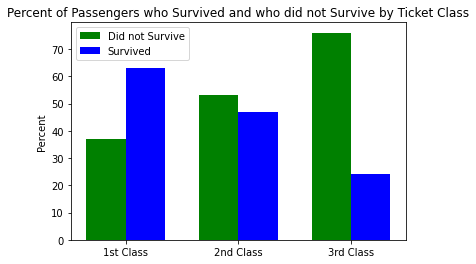

In [18]:
import matplotlib.pyplot as plt

# Need this for graphing purposes - it's the number of passenger classes
N = 3 ## Fill in here 


Died = (37, 53, 76) # Percent that died in each ticket class
Survived = (63, 47, 24) #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of Passengers who Survived and who did not Survive by Ticket Class')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1st Class','2nd Class','3rd Class'))

ax.legend((rects1[0], rects2[0]), ('Did not Survive', 'Survived'))
plt.show()


We can see by our lovely graph and chi-square test that:
- We can see that ticket class and survival are not only related, there is a correlation as well.



---



Now let's look at passenger sex and survival.  Were women and children really the first ones in the lifeboats?

Note that here both child and adult males are considered male and child and adult females are considered female in the data so we really can't conclude anything about children from this analysis.


First, is a chi-square test appropriate for these data?

Answer: Yes, the chi square test is appropriate because both gender and survival are categorical variables, and the contingency matrix is dense.

What is the distribution of passenger sex on the Titanic?

In [20]:
#Relative frequency of gender
print(df['Sex'].value_counts())

#Relative frequency of gender
print(df['Sex'].value_counts()/len(df))

male      573
female    314
Name: Sex, dtype: int64
male      0.645998
female    0.354002
Name: Sex, dtype: float64


Passengers on the Titanic were... 65% Male, 35% Female

Refresh your memory by calculating the distribution of passenger survival.

In [22]:
#Frequency of survival
print(df['Survived'].value_counts())


#Relative frequency of survival
print(df['Survived'].value_counts()/len(df))


0    545
1    342
Name: Survived, dtype: int64
0    0.614431
1    0.385569
Name: Survived, dtype: float64


Survival results: 38.6% Survived, 61.4% Died

Calculate the joint distribution of passenger sex and survival.  Add on the margins.  Can you draw any initial conclusions about the relationship between passenger sex and survival?

In [23]:
#Joint distribution and joint distribution adding margins.
pd.crosstab(df['Sex'],df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


Results: 

Calculate the distribution of survival conditional on passenger sex.  What does this tell you?

In [25]:
#Conditional distribution of survival by passenger sex
pd.crosstab(df['Sex'],df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.809773,0.190227


Results: 

Now we need to conduct the chi-square test.  What are our hypotheses?

**Ho:** There is no association between passenger sex and survival.

**Ha:** There IS an association between passenger sex and survival.

In [26]:
#chi-square test
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(258.3912607678978,
 3.847574039733745e-58,
 1,
 array([[192.93122886, 121.06877114],
        [352.06877114, 220.93122886]]))

What is the p-value?  What do we conclude (at the 0.05 significance level) about the relationship between passenger sex and survival?

Results: The p-value is 3.8x10^-58, which is far below the threshold of 0.05, and thus the null hypothesis is shattered.

Create a side-by-side bar plot illustrating the relationship of passenger sex and survival.  

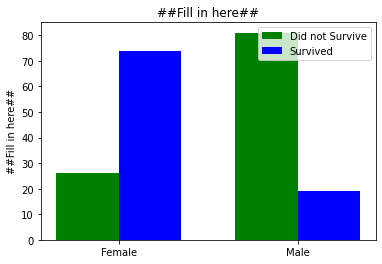

In [30]:
#Need this for graphing purposes - it's the number of sexes (male and female)

N = 2 ## Fill in here ##


Died = (26, 81) ## Fill in here ## # Percent that died in each ticket class
Survived = (74, 19) ## Fill in here ## #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('##Fill in here##')
ax.set_title('##Fill in here##')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female','Male'))

ax.legend((rects1[0], rects2[0]), ('Did not Survive','Survived'))

plt.show()

Explain your results to someone who is interested in Titanic history but knows little about statistics.

Just for fun, is there a relationship between Sex and Class?

In [31]:
chi2_contingency(pd.crosstab(df['Sex'],df['Pclass']))

(16.271573346171404,
 0.0002928685533212755,
 2,
 array([[ 76.46448703,  65.13641488, 172.39909808],
        [139.53551297, 118.86358512, 314.60090192]]))

The p-value for Class vs Sex is 0.00029, which is less than 0.05. There is a statistically significant relationship between Class and Sex, although it's not as strong as Class vs Survival or Sex vs Survival.

In [33]:
chi2_contingency(pd.crosstab(df['Survived'],df['Age']))

(109.86296062384329,
 0.05731493953999638,
 88,
 array([[ 0.61443067,  0.61443067,  1.22886133,  1.22886133,  0.61443067,
          4.30101466,  6.75873732,  4.30101466,  6.75873732,  3.68658399,
          1.843292  ,  3.07215333,  3.68658399,  4.91544532,  1.22886133,
          2.45772266,  1.22886133,  1.22886133,  4.30101466,  0.61443067,
          3.07215333, 12.2886133 ,  9.83089064, 22.11950395, 20.27621195,
         14.1319053 ,  0.61443067, 20.89064262, 23.96279594, 15.36076663,
          0.61443067, 20.89064262,  0.61443067, 14.74633596, 12.90304397,
         15.97519729, 22.73393461,  1.22886133, 15.36076663, 20.27621195,
          1.22886133, 11.67418264, 12.90304397,  1.22886133, 10.44532131,
         10.44532131,  0.61443067, 12.90304397, 14.1319053 ,  0.61443067,
          7.37316798,  7.37316798, 11.05975197, 11.05975197,  1.22886133,
          5.52987599, 10.44532131,  4.30101466,  5.52987599,  8.60202931,
          1.22886133,  3.68658399,  6.14430665,  7.37316798,  4.

And lastly, the p-value for Age vs Survived is 0.057, which is not statistically significant.

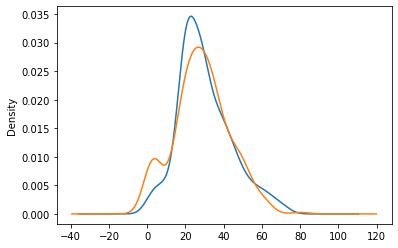

In [44]:
unvived = df[df['Survived'] == 0]
survived = df[df['Survived'] == 1]

unvived['Age'].plot.kde()
survived['Age'].plot.kde()